# Análise de Dados Públicos - CAGED

In [1]:
# Importação das ferramentas necessárias para análise dos dados

import pandas as pd
import matplotlib
low_memory=False
%matplotlib notebook
%matplotlib inline

In [2]:
# Leitura do arquivo de layout dos dados.

userows=[0, 1, 7, 12, 15, 16, 17, 19, 20, 22, 23, 24]

dfLayoutDados = pd.read_excel(r'./dados/Layout_Novo_Caged_Movimentacao.xlsx',
                         sheet_name='Layout',
                         engine='openpyxl',
                            
                         skiprows=lambda x: x not in userows)

In [3]:
columns=['sexo', 'idade', 'graudeinstrução', 'salário', 'raçacor',
         'município', 'seção', 'tipomovimentação','tipodedeficiência']

meses=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Dados CAGED - 2020
caged2020 = {
    'Janeiro':pd.read_csv(r'./dados/CAGEDMOV202001.txt', delimiter=';', usecols=columns),
    'Fevereiro':pd.read_csv(r'./dados/CAGEDMOV202002.txt', delimiter=';', usecols=columns),
    'Março':pd.read_csv(r'./dados/CAGEDMOV202003.txt', delimiter=';', usecols=columns),
    'Abril':pd.read_csv(r'./dados/CAGEDMOV202004.txt', delimiter=';', usecols=columns),
    'Maio':pd.read_csv(r'./dados/CAGEDMOV202005.txt', delimiter=';', usecols=columns),
    'Junho':pd.read_csv(r'./dados/CAGEDMOV202006.txt', delimiter=';', usecols=columns),
    'Julho':pd.read_csv(r'./dados/CAGEDMOV202007.txt', delimiter=';', usecols=columns),
    'Agosto':pd.read_csv(r'./dados/CAGEDMOV202008.txt', delimiter=';', usecols=columns),
    'Setembro':pd.read_csv(r'./dados/CAGEDMOV202009.txt', delimiter=';', usecols=columns),
    'Outubro':pd.read_csv(r'./dados/CAGEDMOV202010.txt', delimiter=';', usecols=columns),
    'Novembro':pd.read_csv(r'./dados/CAGEDMOV202011.txt', delimiter=';', usecols=columns),
    'Dezembro':pd.read_csv(r'./dados/CAGEDMOV202012.txt', delimiter=';', usecols=columns)
}

# Dados CAGED - 2021
caged2021 = {
    'Janeiro':pd.read_csv(r'./dados/CAGEDMOV202101.txt', delimiter=';', usecols=['tipomovimentação', 'sexo']),
    'Fevereiro':pd.read_csv(r'./dados/CAGEDMOV202102.txt', delimiter=';', usecols=['tipomovimentação', 'sexo']),
    'Marco':pd.read_csv(r'./dados/CAGEDMOV202103.txt', delimiter=';', usecols=['tipomovimentação', 'sexo']),
    'Abril':pd.read_csv(r'./dados/CAGEDMOV202104.txt', delimiter=';', usecols=['tipomovimentação', 'sexo'])
}

# Dados de Consumo das Famílias em 2020 retirado da tabela de contas nacionais do IBGE
# Fonte: https://www.ibge.gov.br/estatisticas/economicas/industria/9300-contas-nacionais-trimestrais.html?edicao=30161&t=resultados
consumoFamilias2020 = {'1o Trimestre':96.7, '2o Trimestre': 85.7, '3o Trimestre': 94.6, '4o Trimestre': 101.2}

df20 = pd.concat(caged2020)

df21 = pd.concat(caged2021)

In [4]:
df20 = df20.reset_index()
df20.columns = ['Mês', '#', 'Município', 'Setor', 'Nível de Escolaridade', 'Idade', 'Raça/Cor', 'Sexo', 'Condição', 'Deficiência', 'Salário']

df21 = df21.reset_index()
df21.columns = ['Mês', '#', 'Sexo', 'Condição']

In [5]:
# Função para ministrar admissões e demissões - cada número representa um código, fornecido pela planilha de Layout dos Microdados do CAGED.

admissao=[10, 20, 25, 35, 70]
demissao=[31, 32, 33, 40, 43, 45, 80, 90, 98]

def troca_condicao(codigo):
    if codigo in admissao:
        return 'Empregado'
    elif codigo in demissao:
        return 'Desempregado'
    return 'Não identificado'

df20['Tipo Movimentação'] = df20['Condição']

In [6]:
# Função para definição da classe social pertencente a partir do salário
# fonte: https://www.todamateria.com.br/classe-social/

def classe_social(salario):
    salario_minimo = 1100
    if salario <= 2*salario_minimo:
        return 'E'
    elif salario <= 4*salario_minimo:
        return 'D'
    elif salario <= 10*salario_minimo:
        return 'C'
    elif salario < 20*salario_minimo:
        return 'B'
    return 'A'

df20['Classe Social'] = df20['Salário']

In [7]:
# Função para definição da faixa etária pertencente
# fonte: https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm

def faixa_etaria(idade):
    if idade <= 19:
        return 'Jovem'
    elif idade <= 59:
        return 'Adulto'
    return 'Idoso'

df20['Faixa Etária'] = df20['Idade']        

In [8]:
# Chave com código: {gênero correspondente} a cerca dos gêneros fornecidos pelo CAGED

troca_genero = {1: 'Homem', 3:'Mulher', 9:'Não Identificado'}

# Chave com código: {nível de escolaridade} a cerca dos dados referentes a grau de instrução fornecidos pelo CAGED

troca_nivel_escolaridade = {1:'Analfabeto', 2:'Até 5ª Incompleto', 3:'5ª Completo Fundamental',
                          4:'6ª a 9ª Fundamental', 5:'Fundamental Completo', 6:'Médio Incompleto',
                          7:'Médio Completo', 8:'Superior Incompleto', 9:'Superior Completo',
                          10:'Mestrado', 11:'Doutorado', 80:'Pós-Graduação completa', 99:'Não Identificado'}

# Chave com código: {setor} a cerca dos dados referentes a seção do emprego fornecido pelo CAGED

troca_secao = {'A':'Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura', 
              'B':'Indústrias Extrativas', 'C':'Indústrias de Transformação', 'D':'Eletricidade e Gás', 
              'E':'Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação', 'F':'Construção', 
              'G':'Comércio, Reparação de Veículos Automotores e Motocicletas', 'H':'Transporte, Armazenagem e Correio', 
              'I':'Alojamento e Alimentação', 'J':'Informação e Comunicação', 'K':'Atividades Financeiras, de Seguros e Serviços Relacionados', 
              'L':'Atividades Imobiliárias', 'M':'Atividades Profissionais, Científicas e Técnicas', 
              'N':'Atividades Administrativas e Serviços Complementares', 'O':'Administração Pública, Defesa e Seguridade Social', 
              'P':'Educação', 'Q':'Saúde Humana e Serviços Sociais', 'R':'Artes, Cultura, Esporte e Recreação',
              'S':'Outras Atividades de Serviços', 'T':'Serviços Domésticos', 
              'U':'Organismos Internacionais e Outras Instituições Extraterritoriais', 'Z':'Não identificado'}

# Chave com código: {etnia/cor} a cerca dos dados referentes a etnia fornecido pelo CAGED

troca_etnia_cor = {1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não informada', 9: 'Não identificado'}

# Chave com código: {tipo movimentação} a cerca dos dados referentes a tipo de movimentação fornecido pelo CAGED
troca_tipo_movimentacao = {10:'Admissão por primeiro emprego', 20:'Admissão por reemprego', 25:'Admissão por contrato trabalho prazo determinado', 
                           31:'Desligamento por demissão sem justa causa', 32:'Desligamento por demissão com justa causa', 33:'Culpa Recíproca', 
                           35:'Admissão por reintegração', 40:'Desligamento a pedido', 43:'Término contrato trabalho prazo determinado', 
                           45:'Desligamento por Término de contrato', 50:'Desligamento por aposentadoria', 60:'Desligamento por morte', 70:'Admissão por transferência', 
                           80:'Desligamento por transferência', 90:'Desligamento por Acordo entre empregado e empregador', 98:'Desligamento de Tipo Ignorado', 
                           99:'Não Identificado'}

In [9]:
# Aloca os valores com a alteração do código presente nos dados a partir do Layout.

df20['Condição'] = df20['Condição'].apply(lambda x: troca_condicao(x))

df20['Sexo'] = df20['Sexo'].apply(lambda x: troca_genero[x])

df20['Nível de Escolaridade'] = df20['Nível de Escolaridade'].apply(lambda x: troca_nivel_escolaridade[x])

df20['Setor'] = df20['Setor'].apply(lambda x: troca_secao[x])

df20['Raça/Cor'] = df20['Raça/Cor'].apply(lambda x: troca_etnia_cor[x])

df20['Classe Social'] = df20['Classe Social'].apply(lambda x: classe_social(x))

df20['Faixa Etária'] = df20['Faixa Etária'].apply(lambda x: faixa_etaria(x))

df20['Tipo Movimentação'] = df20['Tipo Movimentação'].apply(lambda x: troca_tipo_movimentacao[x])


df21['Sexo'] = df21['Sexo'].apply(lambda x: troca_genero[x])

df21['Condição'] = df21['Condição'].apply(lambda x: troca_condicao(x))

---
# Índice de emprego e desemprego por gênero no ano de 2020

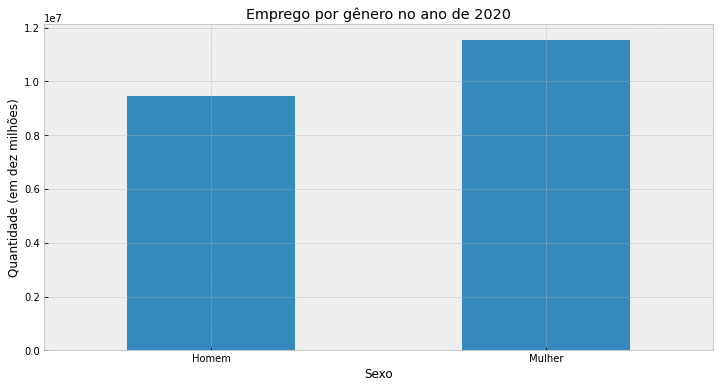

In [10]:
matplotlib.style.use('bmh')

dfEmpregoHomem = df20.query('Condição == "Empregado" and Sexo == "Homem" or Sexo == "Mulher"').groupby('Sexo').size().plot(kind="bar", figsize=(12, 6), ylabel='Quantidade (em dez milhões)', rot=0).set_title('Emprego por gênero no ano de 2020')

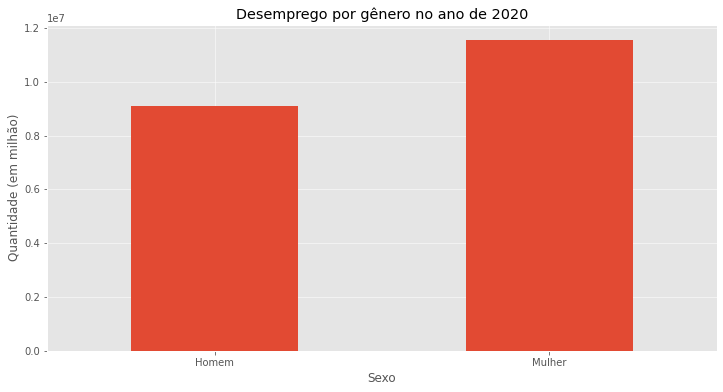

In [11]:
matplotlib.style.use('ggplot')

dfDesempregoHomem = df20.query('Condição == "Desempregado" and Sexo == "Homem" or Sexo == "Mulher"').groupby('Sexo').size().plot(kind="bar", figsize=(12, 6), ylabel='Quantidade (em milhão)', rot=0).set_title('Desemprego por gênero no ano de 2020')

---
# Índice de emprego e desemprego por classe social no ano de 2020

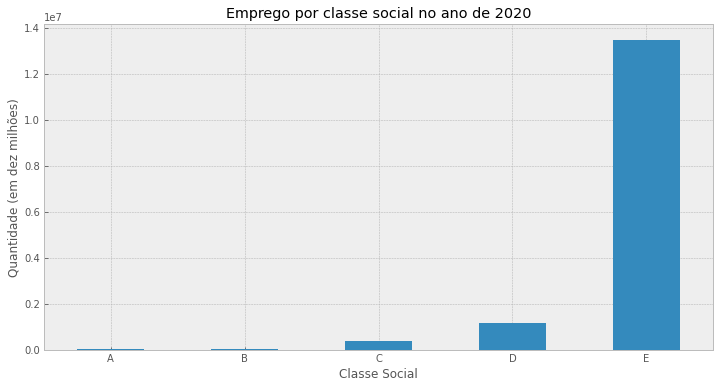

In [12]:
matplotlib.style.use('bmh')

dfEmpregoClasse = df20.query('Condição == "Empregado"').groupby('Classe Social').size().plot(kind="bar", figsize=(12, 6), ylabel='Quantidade (em dez milhões)', rot=0).set_title('Emprego por classe social no ano de 2020')

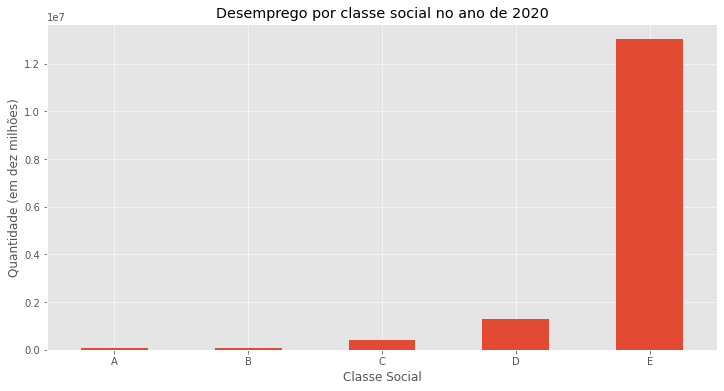

In [13]:
matplotlib.style.use('ggplot')

dfDesempregoClasse = df20.query('Condição == "Desempregado"').groupby('Classe Social').size().plot(kind="bar", figsize=(12, 6), ylabel='Quantidade (em dez milhões)', rot=0).set_title('Desemprego por classe social no ano de 2020')

---
# Índice de emprego e desemprego por faixa etária no ano de 2020

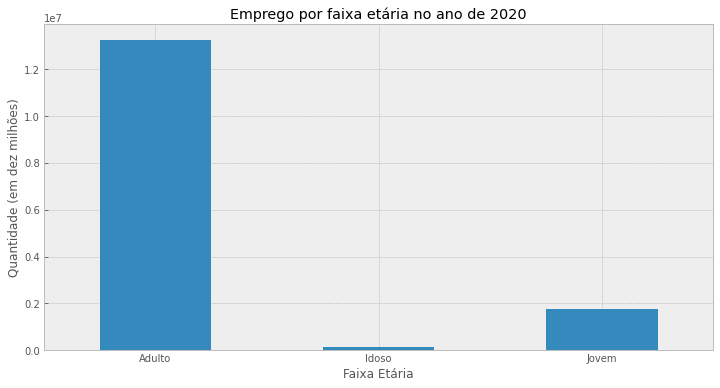

In [14]:
matplotlib.style.use('bmh')

dfEmpregoFaixaEtaria = df20.query('Condição == "Empregado"').groupby('Faixa Etária').size().plot(kind="bar", figsize=(12, 6), ylabel='Quantidade (em dez milhões)', rot=0).set_title('Emprego por faixa etária no ano de 2020')

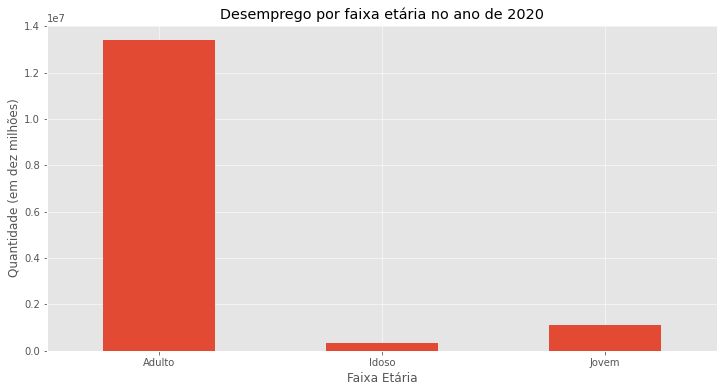

In [15]:
matplotlib.style.use('ggplot')

dfDesempregoFaixaEtaria = df20.query('Condição == "Desempregado"').groupby('Faixa Etária').size().plot(kind="bar", figsize=(12, 6), ylabel='Quantidade (em dez milhões)', rot=0).set_title('Desemprego por faixa etária no ano de 2020')

---
# Índice de emprego e desemprego por nível de escolaridade

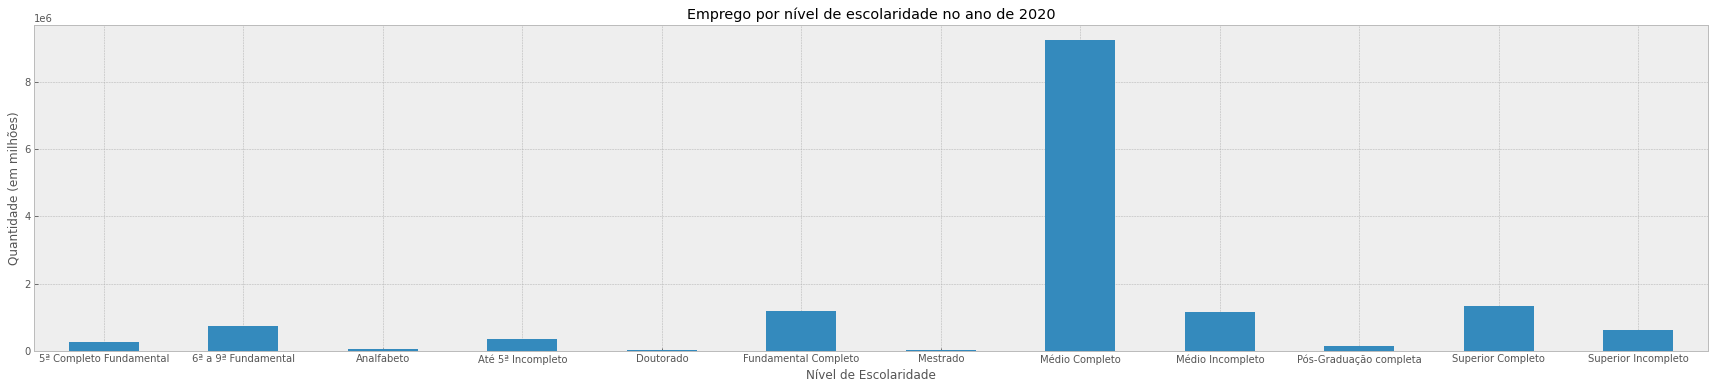

In [16]:
matplotlib.style.use('bmh')

dfEmpregoNivelEscolaridade = df20.query('Condição == "Empregado"').groupby('Nível de Escolaridade').size().plot(kind="bar", figsize=(30, 6), ylabel='Quantidade (em milhões)', rot=0).set_title('Emprego por nível de escolaridade no ano de 2020')

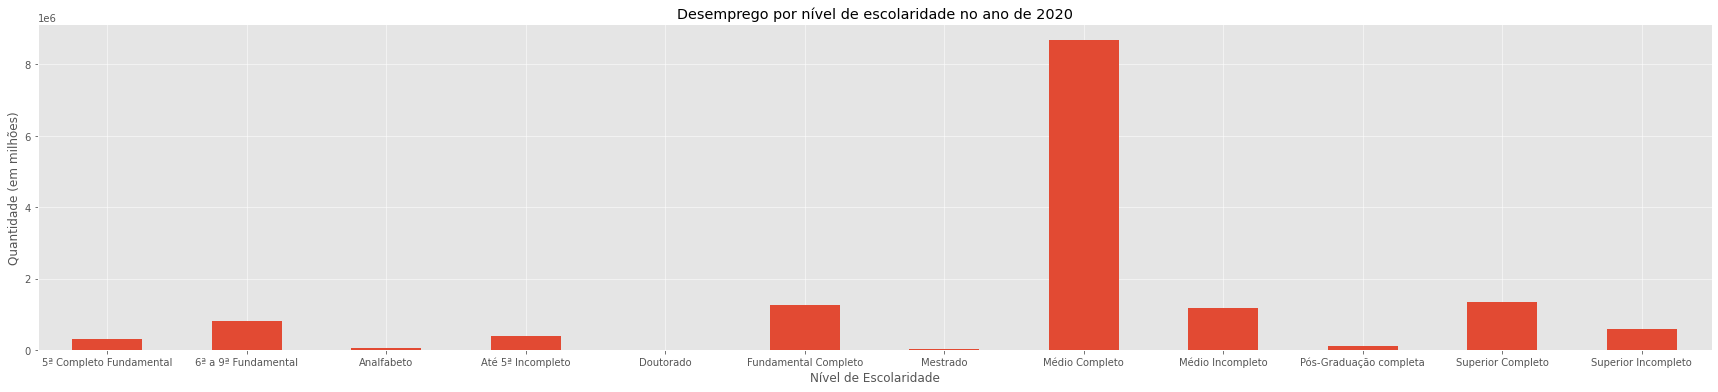

In [17]:
matplotlib.style.use('ggplot')

dfDesempregoNivelEscolaridade = df20.query('Condição == "Desempregado"').groupby('Nível de Escolaridade').size().plot(kind="bar", figsize=(30, 6), ylabel='Quantidade (em milhões)', rot=0).set_title('Desemprego por nível de escolaridade no ano de 2020')

---
# Índice de emprego e desemprego por setor

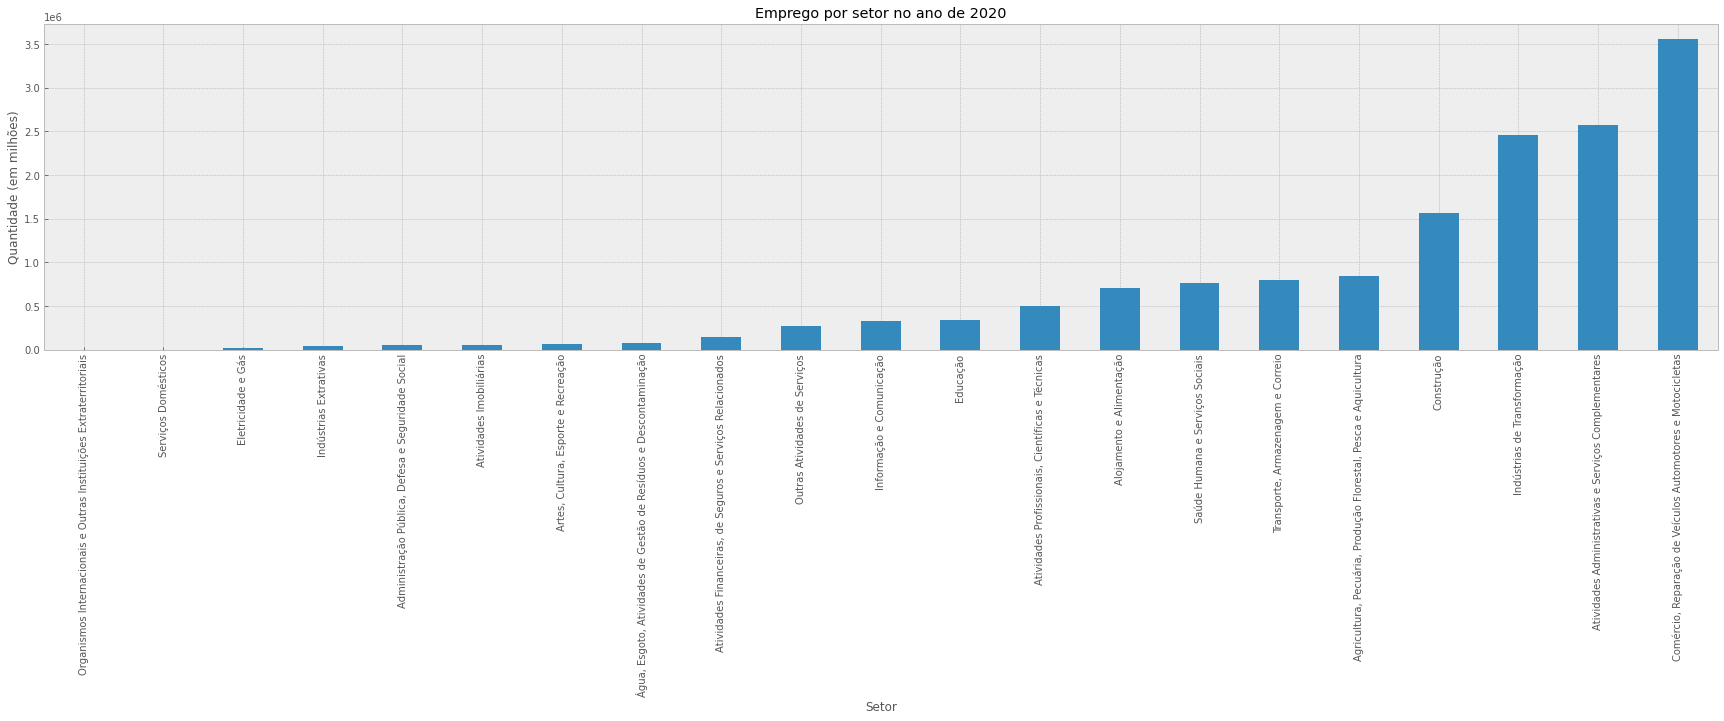

In [18]:
matplotlib.style.use('bmh')

dfEmpregoSetor = df20.query('Condição == "Empregado"').groupby('Setor').size().sort_values().plot(kind="bar", figsize=(30, 6), ylabel='Quantidade (em milhões)').set_title('Emprego por setor no ano de 2020')

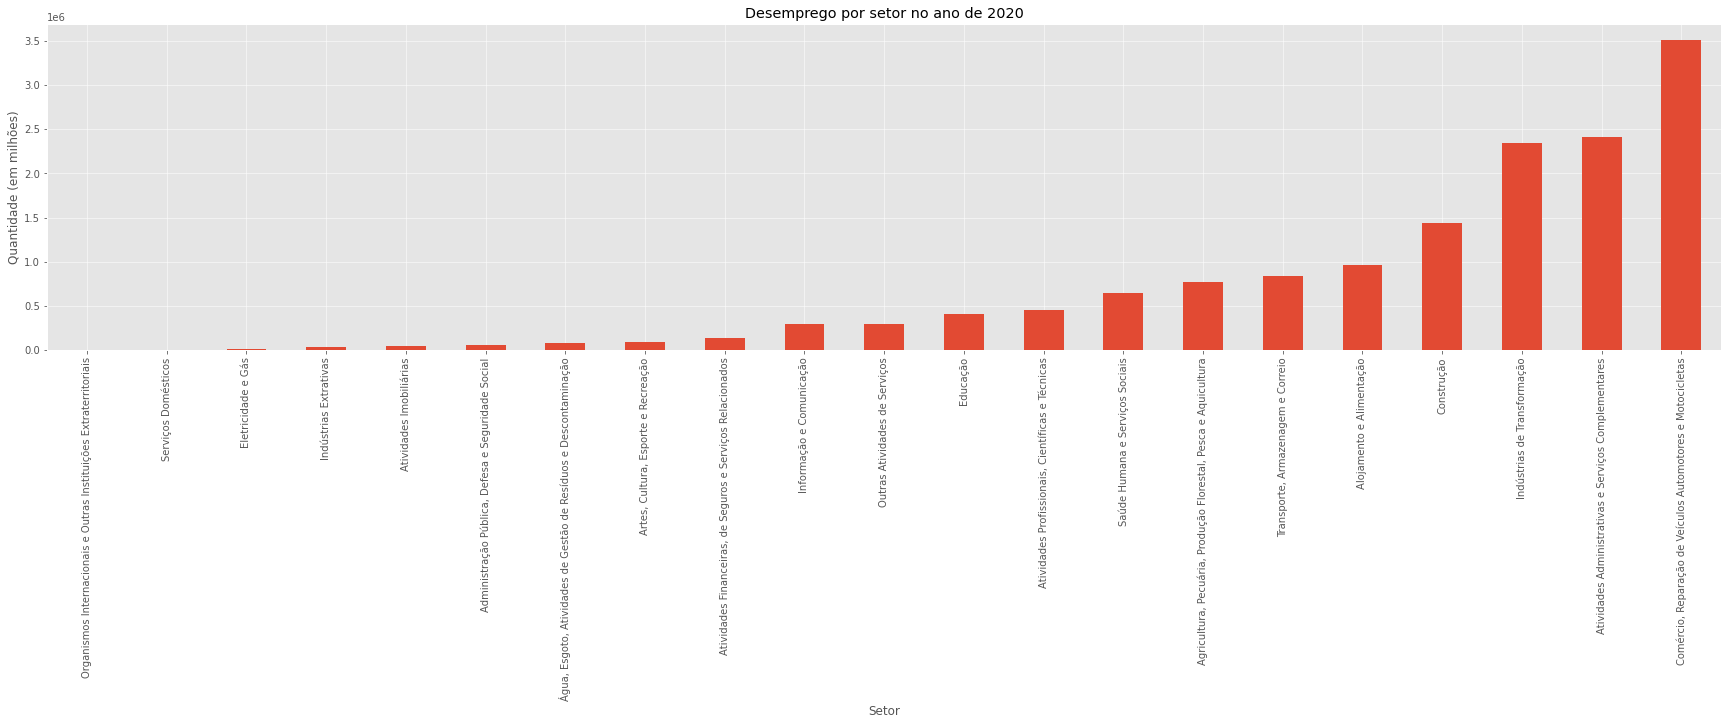

In [19]:
matplotlib.style.use('ggplot')

dfDesempregoSetor = df20.query('Condição == "Desempregado"').groupby('Setor').size().sort_values().plot(kind="bar", figsize=(30, 6), ylabel='Quantidade (em milhões)').set_title('Desemprego por setor no ano de 2020')

---
# Consumo das famílias em relação ao emprego em 2020

In [20]:
Trimestre1E = df20.query('Condição == "Empregado" and Mês == "Janeiro" or Mês == "Fevereiro" or Mês == "Março"').groupby('Mês').size().sort_values(ascending=False).sum()
Trimestre2E = df20.query('Condição == "Empregado" and Mês == "Abril" or Mês == "Maio" or Mês == "Junho"').groupby('Mês').size().sort_values(ascending=False).sum()
Trimestre3E = df20.query('Condição == "Empregado" and Mês == "Julho" or Mês == "Agosto" or Mês == "Setembro"').groupby('Mês').size().sort_values(ascending=False).sum()
Trimestre4E = df20.query('Condição == "Empregado" and Mês == "Outubro" or Mês == "Novembro" or Mês == "Dezembro"').groupby('Mês').size().sort_values(ascending=False).sum()

print(f"""  Emprego por trimestre 2020\n\n1o Trimestre: {Trimestre1E}\n2o Trimestre: {Trimestre2E}\n3o Trimestre: {Trimestre3E}\n4o Trimestre: {Trimestre4E}.""")

  Emprego por trimestre 2020

1o Trimestre: 7662387
2o Trimestre: 4431650
3o Trimestre: 6028617
4o Trimestre: 6868261.


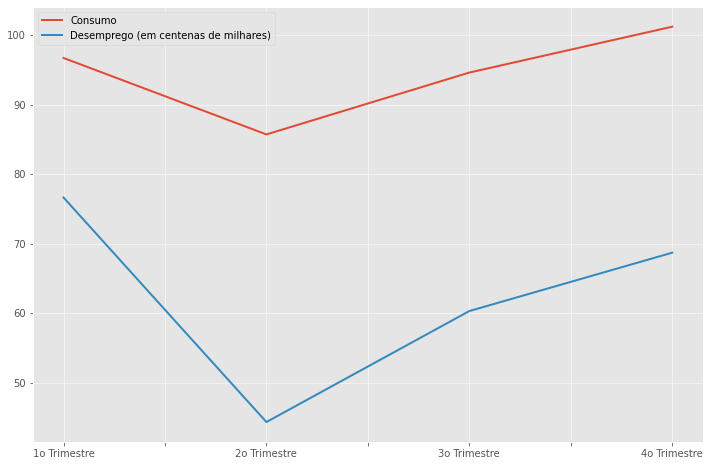

In [21]:
empregados=[Trimestre1E, Trimestre2E, Trimestre3E, Trimestre4E]
empregadosCent=[x/100000 for x in empregados]
consumo=list(consumoFamilias2020.values())
trimestres=list(consumoFamilias2020.keys())

dfConsumoEmprego = pd.DataFrame(list(zip(consumo, empregadosCent)),
                                index = trimestres,
                                columns=['Consumo', 'Emprego'])

dfConsumoEmprego.plot(figsize=(12, 8)).legend(["Consumo", "Desemprego (em centenas de milhares)"])

---
# Consumo das famílias em relação ao desemprego

In [22]:
Trimestre1D = df20.query('Condição == "Desempregado" and Mês == "Janeiro" or Mês == "Fevereiro" or Mês == "Março"').groupby('Mês').size().sum()
Trimestre2D = df20.query('Condição == "Empregado" and Mês == "Abril" or Mês == "Maio" or Mês == "Junho"').groupby('Mês').size().sum()
Trimestre3D = df20.query('Condição == "Empregado" and Mês == "Julho" or Mês == "Agosto" or Mês == "Setembro"').groupby('Mês').size().sum()
Trimestre4D = df20.query('Condição == "Empregado" and Mês == "Outubro" or Mês == "Novembro" or Mês == "Dezembro"').groupby('Mês').size().sum()

print(f"""  Desemprego por trimestre 2020\n\n1o Trimestre: {Trimestre1D}\n2o Trimestre: {Trimestre2D}\n3o Trimestre: {Trimestre3D}\n4o Trimestre: {Trimestre4D}.""")

  Desemprego por trimestre 2020

1o Trimestre: 7531677
2o Trimestre: 4431650
3o Trimestre: 6028617
4o Trimestre: 6868261.


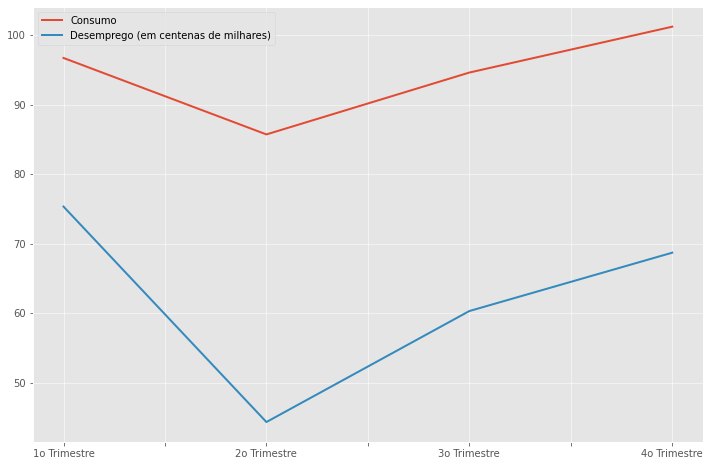

In [23]:
desempregados=[Trimestre1D, Trimestre2D, Trimestre3D, Trimestre4D]
desempregadosCent=[x/100000 for x in desempregados]

dfConsumoDesemprego = pd.DataFrame(list(zip(consumo, desempregadosCent)),
                                index = trimestres,
                                columns=['Consumo', 'Desemprego'])

dfConsumoDesemprego.plot(figsize=(12, 8)).legend(["Consumo", "Desemprego (em centenas de milhares)"])

---
# Admissão por gênero no período da pandemia

In [24]:
admissao2020H = df20.query('Condição == "Empregado" and Mês in ["Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Dezembro"] and Sexo == "Homem"').groupby('Sexo').size().sum()
admissao2021H = df21.query('Condição == "Empregado" and Sexo == "Homem"').groupby('Sexo').size().sum()

admissaoH = admissao2020H + admissao2021H

admissao2020M = df20.query('Condição == "Empregado" and Mês in ["Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Dezembro"] and Sexo == "Mulher"').groupby('Sexo').size().sum()
admissao2021M = df21.query('Condição == "Empregado" and Sexo == "Mulher"').groupby('Sexo').size().sum()

admissaoM = admissao2020M + admissao2021M

print(f'Homens admitidos durante a pandemia: {admissaoH}\nMulheres admitidas durante a pandemia: {admissaoM}')

Homens admitidos durante a pandemia: 10558380
Mulheres admitidas durante a pandemia: 6340395


---
# Demissão por gênero no período da pandemia

In [25]:
demissao2020H = df20.query('Condição == "Desempregado" and Mês in ["Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Dezembro"] and Sexo == "Homem"').groupby('Sexo').size().sum()
demissao2021H = df21.query('Condição == "Desempregado" and Sexo == "Homem"').groupby('Sexo').size().sum()

demissaoH = demissao2020H + demissao2021H

demissao2020M = df20.query('Condição == "Desempregado" and Mês in ["Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Dezembro"] and Sexo == "Mulher"').groupby('Sexo').size().sum()
demissao2021M = df21.query('Condição == "Desempregado" and Sexo == "Mulher"').groupby('Sexo').size().sum()

demissaoM = demissao2020M + demissao2021M

print(f'Homens demitidos durante a pandemia: {demissaoH}\nMulheres demitidas durante a pandemia: {demissaoM}')

Homens demitidos durante a pandemia: 9999420
Mulheres demitidas durante a pandemia: 6339325


---
# Quantidade de demissões por tipo durante o ano de 2020

In [26]:
demissaoPorTipo = df20.query('Condição == "Desempregado"').groupby('Tipo Movimentação').size()
demissaoPorTipo

Tipo Movimentação
Culpa Recíproca                                           21950
Desligamento a pedido                                   3578466
Desligamento de Tipo Ignorado                               705
Desligamento por Acordo entre empregado e empregador     176376
Desligamento por Término de contrato                     149590
Desligamento por demissão com justa causa                189822
Desligamento por demissão sem justa causa               8374527
Término contrato trabalho prazo determinado             2369933
dtype: int64

---
# Diferença salarial entre homens e mulheres admitidos no ano de 2020

In [27]:
def calcula_diferenca(x, y):
    if x == y:
        return 0
    try:
        return ((abs(x - y) / y) * 100.0).round(2)
    except ZeroDivisionError:
        return float('inf')

In [28]:
mediaSalarioMulherAdmitida = df20.query('Condição == "Empregado" and Sexo == "Mulher"')
mediaSalarioMulherAdmitida = mediaSalarioMulherAdmitida['Salário'].mean().round()

mediaSalarioHomemAdmitido = df20.query('Condição == "Empregado" and Sexo == "Homem"')
mediaSalarioHomemAdmitido = mediaSalarioHomemAdmitido['Salário'].mean().round()

print(f'Salário mulher: {mediaSalarioMulherAdmitida}\nSalário homem: {mediaSalarioHomemAdmitido}\n\nDiferença = {calcula_diferenca(mediaSalarioHomemAdmitido, mediaSalarioMulherAdmitida)}%')

Salário mulher: 3467.0
Salário homem: 36895.0

Diferença = 964.18%


---
# Diferença salarial entre homens e mulheres demitidos no ano de 2020

In [29]:
mediaSalarioMulherDemitida = df20.query('Condição == "Desempregado" and Sexo == "Mulher"')
mediaSalarioMulherDemitida = mediaSalarioMulherDemitida['Salário'].mean().round()

mediaSalarioHomemDemitido = df20.query('Condição == "Desempregado" and Sexo == "Homem"')
mediaSalarioHomemDemitido = mediaSalarioHomemDemitido['Salário'].mean().round()

print(f'Salário mulher: {mediaSalarioMulherDemitida}\nSalário homem: {mediaSalarioHomemDemitido}\n\nDiferença = {calcula_diferenca(mediaSalarioHomemDemitido, mediaSalarioMulherDemitida)}%')

Salário mulher: 3422.0
Salário homem: 8655.0

Diferença = 152.92%


---
# Média salarial por raça/cor no ano de 2020

In [30]:
mediaBranca = df20.query('`Raça/Cor` == "Branca"')
mediaBranca = mediaBranca['Salário'].mean().round()

mediaPreta = df20.query('`Raça/Cor` == "Preta"')
mediaPreta = mediaPreta['Salário'].mean().round()

mediaParda = df20.query('`Raça/Cor` == "Parda"')
mediaParda = mediaParda['Salário'].mean().round()

mediaAmarela = df20.query('`Raça/Cor` == "Amarela"')
mediaAmarela = mediaAmarela['Salário'].mean().round()

mediaIndigena = df20.query('`Raça/Cor` == "Indígena"')
mediaIndigena = mediaIndigena['Salário'].mean().round()

naoInformada = df20.query('`Raça/Cor` == "Não informada" or `Raça/Cor` == "Não identificado"').groupby('#').size().sum()

print(f'''
Raça/Cor\tMédia salarial\n\n
Branca\t\t{mediaBranca}\n
Preta\t\t{mediaPreta}\n
Parda\t\t{mediaParda}\n
Amarela\t\t{mediaAmarela}\n
Indígena\t\t{mediaIndigena}\n\n\n
Raça/Cor não informada ou não identificada: {naoInformada} ''')


Raça/Cor	Média salarial


Branca		6120.0

Preta		5651.0

Parda		4292.0

Amarela		3570.0

Indígena		5083.0



Raça/Cor não informada ou não identificada: 5527812 


---
# Causa de demissão em relação ao gênero - ano de 2020

Text(0, 0.5, 'Quantidade (em milhões)')

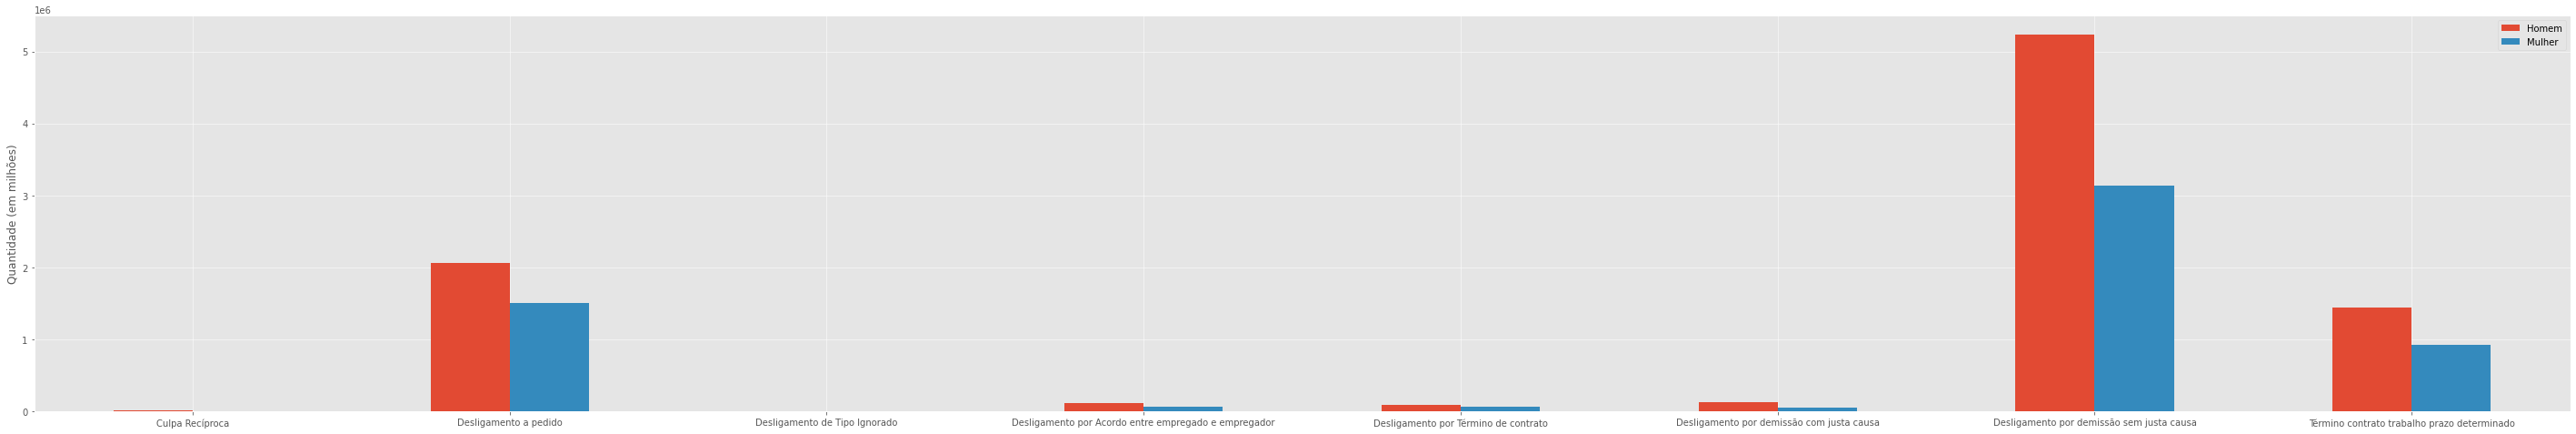

In [31]:
indexes = ['Culpa Recíproca', 'Desligamento a pedido', 'Desligamento de Tipo Ignorado', 'Desligamento por Acordo entre empregado e empregador', 
         'Desligamento por Término de contrato', 'Desligamento por demissão com justa causa', 'Desligamento por demissão sem justa causa',
         'Término contrato trabalho prazo determinado']

dfCausaDemissaoHomem = df20.query('Condição == "Desempregado" and Sexo == "Homem"').groupby('Tipo Movimentação').size()
dfCausaDemissaoHomem = dfCausaDemissaoHomem.reset_index()
dfCausaDemissaoHomem.columns=['Tipo Movimentação', 'Quantidade']


dfCausaDemissaoMulher = df20.query('Condição == "Desempregado" and Sexo == "Mulher"').groupby('Tipo Movimentação').size()
dfCausaDemissaoMulher = dfCausaDemissaoMulher.reset_index()
dfCausaDemissaoMulher.columns=['Tipo Movimentação', 'Quantidade']

dfCausaGenero = pd.DataFrame({'Homem':list(dfCausaDemissaoHomem['Quantidade']), 'Mulher':list(dfCausaDemissaoMulher['Quantidade'])},
                              
                              index = indexes)

axCausaGenero = dfCausaGenero.plot.bar(rot=0, figsize=(50, 8))
axCausaGenero.set_ylabel('Quantidade (em milhões)')

---
# Causa de demissão em relação a raça/cor - ano de 2020

Text(0, 0.5, 'Quantidade (em milhão)')

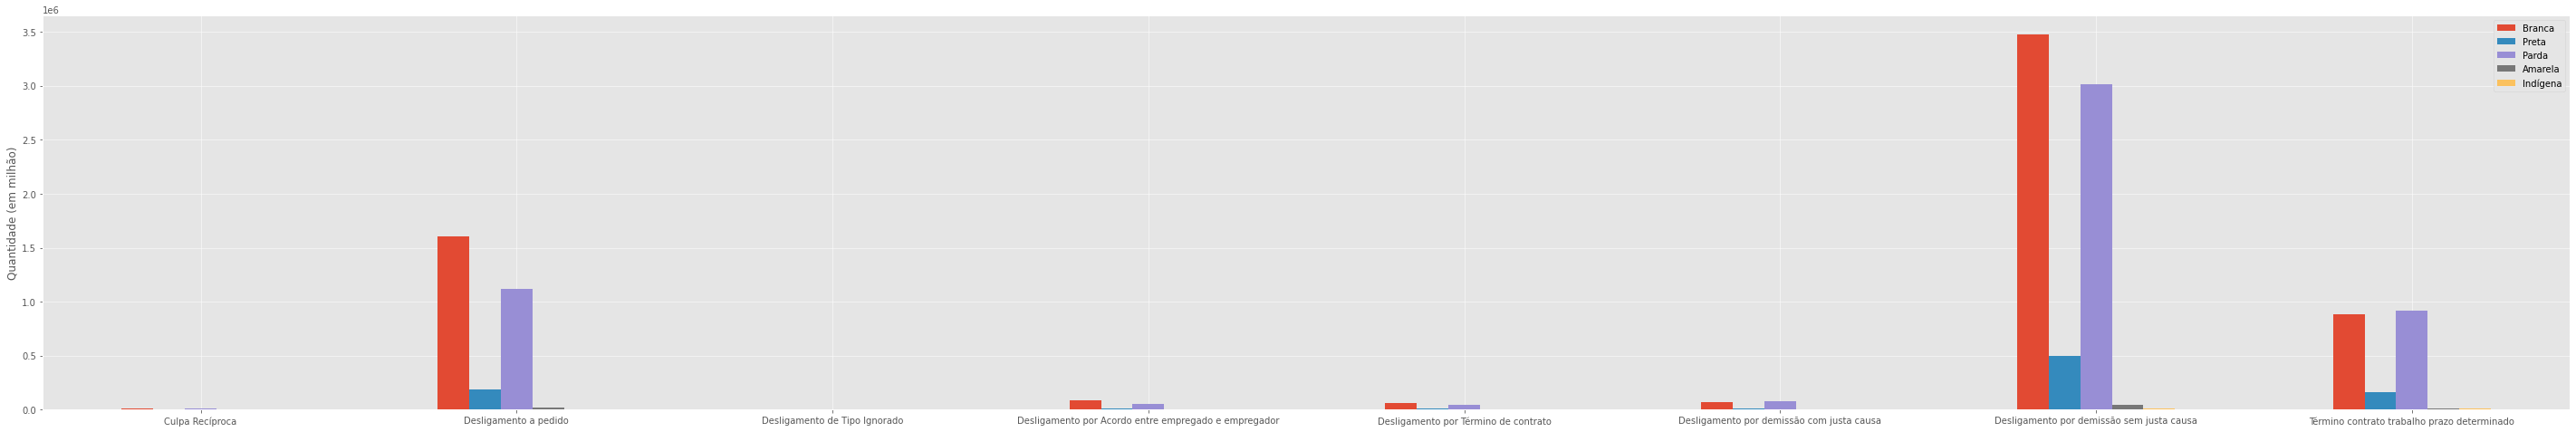

In [32]:
dfCausaDemissaoBranca = df20.query('Condição == "Desempregado" and `Raça/Cor` == "Branca"').groupby('Tipo Movimentação').size()
dfCausaDemissaoBranca = dfCausaDemissaoBranca.reset_index()
dfCausaDemissaoBranca.columns=['Tipo Movimentação', 'Quantidade']


dfCausaDemissaoPreta = df20.query('Condição == "Desempregado" and `Raça/Cor` == "Preta"').groupby('Tipo Movimentação').size()
dfCausaDemissaoPreta = dfCausaDemissaoPreta.reset_index()
dfCausaDemissaoPreta.columns=['Tipo Movimentação', 'Quantidade']

dfCausaDemissaoParda = df20.query('Condição == "Desempregado" and `Raça/Cor` == "Parda"').groupby('Tipo Movimentação').size()
dfCausaDemissaoParda = dfCausaDemissaoParda.reset_index()
dfCausaDemissaoParda.columns=['Tipo Movimentação', 'Quantidade']

dfCausaDemissaoAmarela = df20.query('Condição == "Desempregado" and `Raça/Cor` == "Amarela"').groupby('Tipo Movimentação').size()
dfCausaDemissaoAmarela = dfCausaDemissaoAmarela.reset_index()
dfCausaDemissaoAmarela.columns=['Tipo Movimentação', 'Quantidade']

dfCausaDemissaoIndigena = df20.query('Condição == "Desempregado" and `Raça/Cor` == "Indígena"').groupby('Tipo Movimentação').size()
dfCausaDemissaoIndigena = dfCausaDemissaoIndigena.reset_index()
dfCausaDemissaoIndigena.columns=['Tipo Movimentação', 'Quantidade']

dfCausaRaca = pd.DataFrame({'Branca':list(dfCausaDemissaoBranca['Quantidade']), 'Preta':list(dfCausaDemissaoPreta['Quantidade']),
                            'Parda':list(dfCausaDemissaoParda['Quantidade']), 'Amarela':list(dfCausaDemissaoAmarela['Quantidade']),
                            'Indígena':list(dfCausaDemissaoIndigena['Quantidade'])},
                           
                            index = indexes)

axCausaRaca = dfCausaRaca.plot.bar(rot=0, figsize=(50, 8))
axCausaRaca.set_ylabel('Quantidade (em milhão)')

---
# Causa de demissão em relação a faixa etária - ano de 2020

Text(0, 0.5, 'Quantidade (em milhão)')

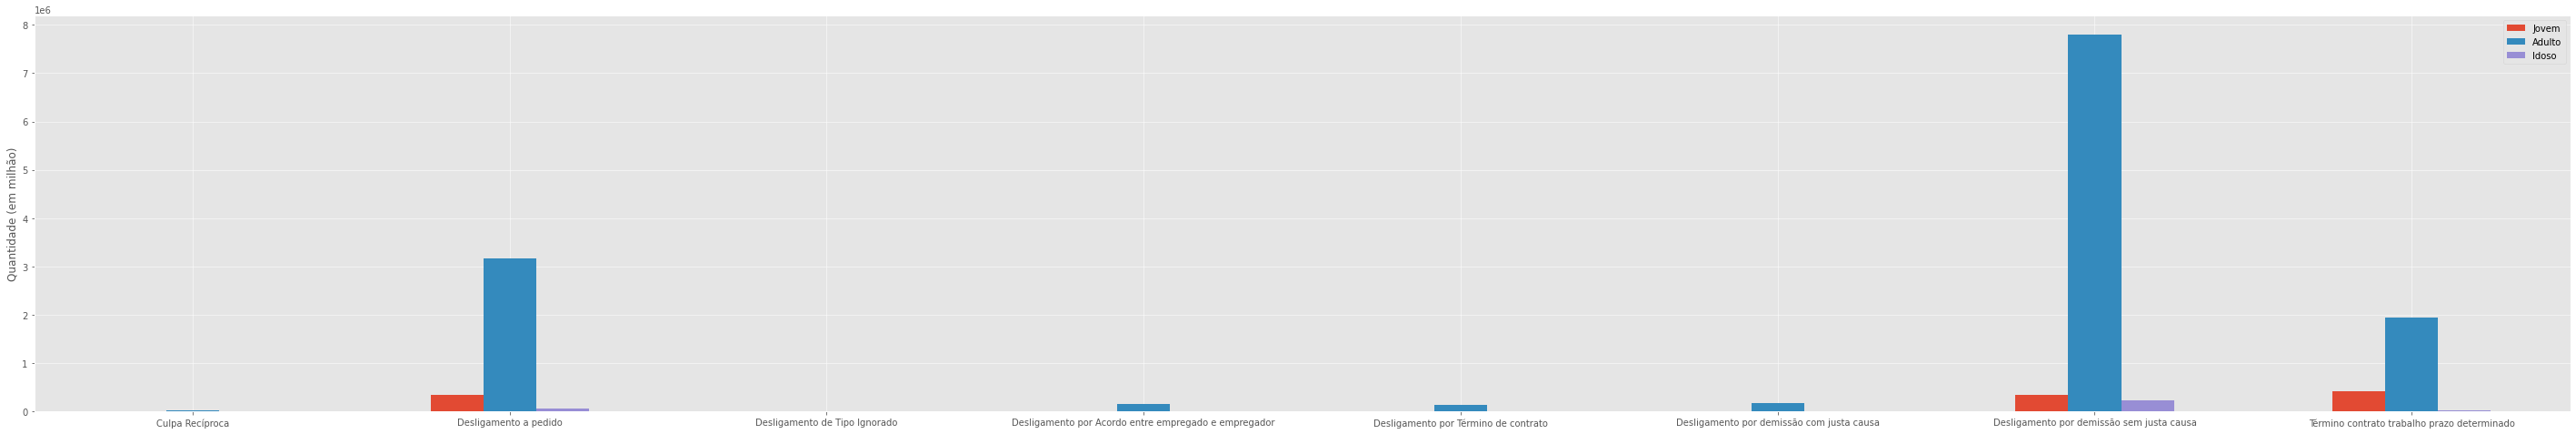

In [33]:
dfCausaDemissaoJovem = df20.query('Condição == "Desempregado" and `Faixa Etária` == "Jovem"').groupby('Tipo Movimentação').size()
dfCausaDemissaoJovem = dfCausaDemissaoJovem.reset_index()
dfCausaDemissaoJovem.columns=['Tipo Movimentação', 'Quantidade']

dfCausaDemissaoAdulto= df20.query('Condição == "Desempregado" and `Faixa Etária` == "Adulto"').groupby('Tipo Movimentação').size()
dfCausaDemissaoAdulto = dfCausaDemissaoAdulto.reset_index()
dfCausaDemissaoAdulto.columns=['Tipo Movimentação', 'Quantidade']

dfCausaDemissaoIdoso = df20.query('Condição == "Desempregado" and `Faixa Etária` == "Idoso"').groupby('Tipo Movimentação').size()
dfCausaDemissaoIdoso = dfCausaDemissaoIdoso.reset_index()
dfCausaDemissaoIdoso.columns=['Tipo Movimentação', 'Quantidade']

dfCausaRaca = pd.DataFrame({'Jovem':list(dfCausaDemissaoJovem['Quantidade']), 'Adulto':list(dfCausaDemissaoAdulto['Quantidade']), 
                            'Idoso':list(dfCausaDemissaoIdoso['Quantidade'])},
                           
                            index = indexes)

axCausaFaixaEtaria = dfCausaRaca.plot.bar(rot=0, figsize=(50, 8))
axCausaFaixaEtaria.set_ylabel('Quantidade (em milhão)')